### Additive modeling

Additive modeling is a statistical method used for modeling the relationship between a dependent variable and multiple independent variables. It involves constructing a model where the effects of each independent variable are added together to predict the dependent variable.

In additive modeling, each independent variable is associated with a smooth function, typically represented using splines or other flexible curve-fitting techniques. These smooth functions are then combined additively to form the overall model. This approach allows for more complex and nonlinear relationships between the independent and dependent variables to be captured.

Additive models are particularly useful when the relationship between the dependent and independent variables is not well represented by a simple linear model. They are commonly used in various fields, including statistics, machine learning, and data analysis, for tasks such as regression, classification, and prediction. Additionally, additive models can offer interpretable insights into the contributions of individual variables to the overall prediction.

In [1]:
import pandas as pd

df = pd.read_csv('50_Startups.csv')

In [2]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df = df.drop(columns=['State'])

In [4]:
df = df.sample(3)
df = round(df/1000)

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
22,74.0,123.0,303.0,110.0
6,135.0,147.0,128.0,156.0
18,92.0,114.0,295.0,124.0


![GB](gb_math.jpg)

In [6]:
# Stpe 1

df['f0(x)'] = df['Profit'].mean()

In [7]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x)
22,74.0,123.0,303.0,110.0,130.0
6,135.0,147.0,128.0,156.0,130.0
18,92.0,114.0,295.0,124.0,130.0


In [8]:
# Step 2

df['r1'] = df['Profit'] - df['f0(x)']
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x),r1
22,74.0,123.0,303.0,110.0,130.0,-20.0
6,135.0,147.0,128.0,156.0,130.0,26.0
18,92.0,114.0,295.0,124.0,130.0,-6.0


In [9]:
from sklearn.tree import DecisionTreeRegressor
# usually max_depth=8 to 32 but our dataset is small that why we are using max_depth=1
dt1 = DecisionTreeRegressor(max_depth=1)

In [10]:
dt1.fit(df.iloc[:, 0:3].values, df['r1'].values)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 113.5\nsquared_error = 370.667\nsamples = 3\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 49.0\nsamples = 2\nvalue = -13.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 26.0')]

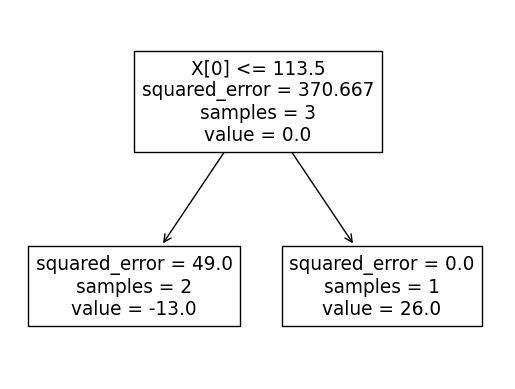

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt1)